# Time evolution

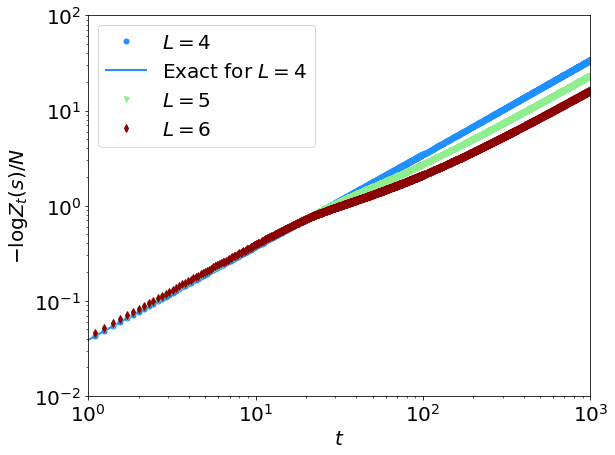

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.zeros(2900)
t[:2000] = np.linspace(0.05, 100, 2000)
t[2000:] = np.linspace(101, 1000, 900)

with open('./data/logZts_L4_exact.npy', 'rb') as f:
    logZts_L4_exact = np.load(f)
    
with open('./data/logZts_L4.npy', 'rb') as f:
    logZts_L4 = np.load(f)
    
with open('./data/logZts_L5.npy', 'rb') as f:
    logZts_L5 = np.load(f)
    
with open('./data/logZts_L6.npy', 'rb') as f:
    logZts_L6= np.load(f)
    
with open('./data/logZts_L4_err.npy', 'rb') as f:
    err = np.load(f)

colorcode=['dodgerblue','lightgreen','darkred']

plt.rc('font', size=20)
fig, ax1 = plt.subplots()
fig.set_size_inches(9, 7)


interval = 3
ax1.plot(t[:2000:interval], -logZts_L4[:2000:interval] / 16, 'o', color=colorcode[0], ms=5, label=r'$L=4$')
ax1.plot(t[2000:], -logZts_L4[2000:] / 16, 'o', color=colorcode[0], ms=5)

ax1.plot(t[::interval], -logZts_L4_exact[::interval] / 16, colorcode[0], lw=2, label='Exact for ' + r'$L=4$')

ax1.plot(t[:2000:interval], -logZts_L5[:2000:interval] / 25, 'v', c=colorcode[1], ms=5, label=r'$L=5$')
ax1.plot(t[2000:], -logZts_L5[2000:] / 25, 'v', c=colorcode[1], ms=5)

ax1.plot(t[:2000:interval], -logZts_L6[:2000:interval] / 36, 'd', c=colorcode[2], ms=5, label=r'$L=6$')
ax1.plot(t[2000:], -logZts_L6[2000:] / 36, 'd', c=colorcode[2], ms=5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax1.set_xlabel('$t$')
ax1.set_ylabel(r'$-\log Z_t(s)/N$')
ax1.set_ylim([1e-2, 1e2])
ax1.set_xlim([1, 1000])
ax1.legend(loc="upper left",fontsize=20)
plt.savefig('./fig-1.jpg', dpi=400, bbox_inches="tight")

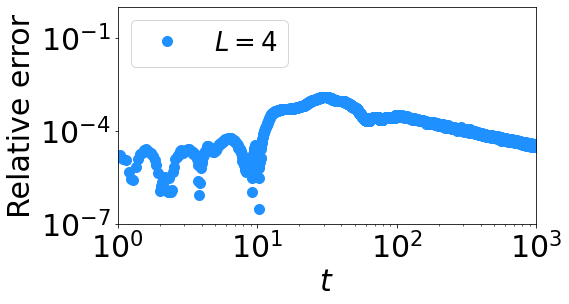

In [2]:
plt.rc('font', size=30)
fig, ax2 = plt.subplots()
fig.set_size_inches(7.5, 4)
ax2.plot(t, err, 'o', c=colorcode[0], ms=10, label=r'$L=4$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('$t$')
ax2.set_ylabel('Relative error')
ax2.set_ylim((1e-7,1e0))
ax2.set_xlim([1e0, 1e3])
ax2.legend(loc="upper left",fontsize=26)
plt.savefig('./fig-1-inset.jpg', dpi=400, bbox_inches="tight")

# Phase transition line

(200, 1000)


<Figure size 2400x1600 with 0 Axes>

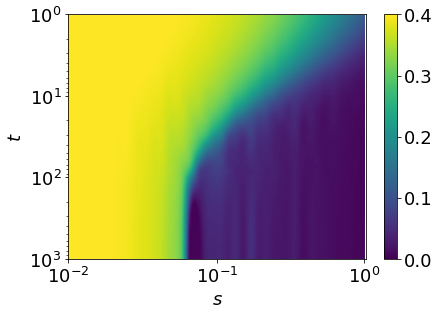

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open('./data/kts_l5.npy', 'rb') as f:
    kts = np.load(f)
plt.rc('font', size=18)    
print(kts.shape)

Dim=2
Listk_lambdaSave=kts.T
plt.figure(num=None,  dpi=400, edgecolor='k')
fig, ax = plt.subplots(1,1)
fig.tight_layout()
kwargs = dict(origin='upper', interpolation='bicubic',
              vmin=np.amin(Listk_lambdaSave), vmax=np.amax(Listk_lambdaSave), aspect='auto')
cf=plt.imshow(Listk_lambdaSave,extent=[0, Listk_lambdaSave.shape[1], Listk_lambdaSave.shape[0], 0], **kwargs)#, cmap="jet", extent=[0, np.array(range(args.Tstep))*args.delta_t+1, 0, SummaryListDynPartiFuncLog.shape[0]], **kwargs)
plt.colorbar(cf, format='%.1f')#(ticks=[-2,-1,0,1,2])#plt.ylabel('x%.0f'%int(i+1))
plt.clim(np.min(Listk_lambdaSave), np.max(Listk_lambdaSave));
plt.clim(0, 0.4);
plt.xlim((0, Listk_lambdaSave.shape[1]))
plt.ylim((Listk_lambdaSave.shape[0],1))
ax.set_yscale('log')

if Dim==2:
    ax.set_xticks([0,100, 199])#ax.set_xticks([0,9, 19])
    ax.set_xticklabels(['$10^{-2}$', '$10^{-1}$','$10^{0}$'])
plt.xlabel('$s$')
plt.ylabel('$t$')
fig.set_size_inches(6.5, 4.5)
plt.savefig('./phase-transition-1.jpg', dpi=400, bbox_inches="tight")


1.3932867825841957 1.5302915268403419


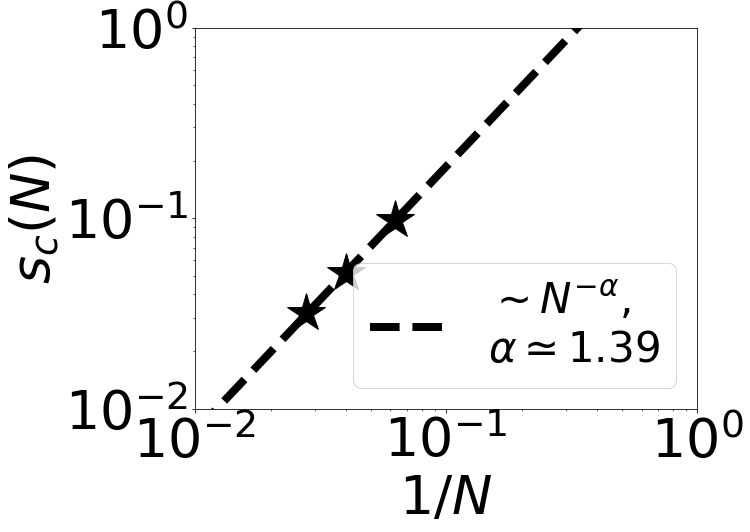

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fontsize = 24

L_arr = np.array([4, 5, 6])
N_arr = L_arr ** 2
sc_arr = np.array([0.09772372209558107, 0.05128613839913648, 0.03162277660168379])

def linear_fit(x, a, b):
    return a * x + b

from scipy.optimize import curve_fit

fitting_parameters, covariance = curve_fit(linear_fit, np.log(1/N_arr), np.log(sc_arr))
a, b = fitting_parameters
print(a, b)

plt.rc('font', size=54)
fig, ax1 = plt.subplots()
fig.set_size_inches(9, 7)

plt.plot(1/N_arr, sc_arr, c='k', marker='*', ls='none', ms=40)

plt.plot(10 ** np.arange(-2,0.1,0.1), np.exp(linear_fit(np.log(10 ** np.arange(-2,0.1,0.1)), a, b)), '--', 
         c='k', linewidth=8,label='$\sim N^{-α}$,\n$α\simeq$'+str(np.round(a, 2)))
plt.legend(fontsize=42)
plt.xscale('log')
plt.yscale('log')
plt.xlim((1e-2, 1e0))
plt.ylim((1e-2, 1e0))
plt.xlabel('$1/N$')
plt.ylabel('$s_{c}(N)$')
fig.set_size_inches(9, 7)
plt.savefig('./phase-transition-2.jpg', dpi=400, bbox_inches="tight")

<Figure size 2400x1600 with 0 Axes>

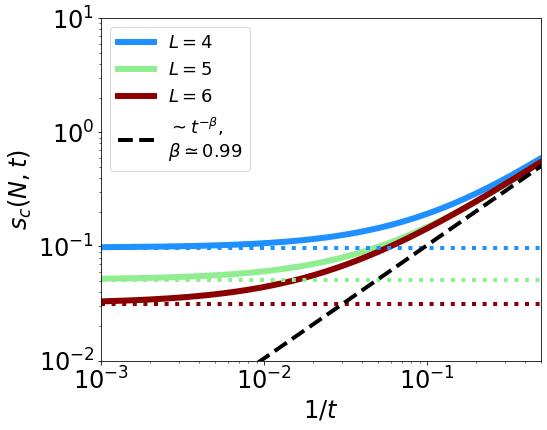

In [5]:
# load data

with open('./data/sc_l4.npy', 'rb') as f:
    sc_l4 = np.load(f)

with open('./data/sc_l5.npy', 'rb') as f:
    sc_l5 = np.load(f)

with open('./data/sc_l6.npy', 'rb') as f:
    sc_l6 = np.load(f)
plt.rc('font', size=24)
t = np.linspace(1, 1000, 1000)
alpha = 1.39
beta = 0.99
sc_arr = np.array([0.09772372209558107, 0.05128613839913648, 0.03162277660168379])

plt.figure(num=None,  dpi=400, edgecolor='k')
fig, ax = plt.subplots(1,1)
fig.tight_layout()

colorcode=['dodgerblue','lightgreen','darkred']
markercode=['o','v','d','s']

ax.plot(1 / t, sc_l4, color=colorcode[0], linestyle='-', markersize=4, label=r'$L=4$', linewidth=6)
ax.plot(1 / t, sc_l5, color=colorcode[1], linestyle='-', markersize=4, label=r'$L=5$', linewidth=6)
ax.plot(1 / t, sc_l6, color=colorcode[2], linestyle='-', markersize=4, label=r'$L=6$', linewidth=6)
ax.plot([1/1000, 1], [0.09772372209558107, 0.09772372209558107], color=colorcode[0], linestyle=':', linewidth=4)
ax.plot([1/1000, 1], [0.05128613839913648, 0.05128613839913648], color=colorcode[1], linestyle=':', linewidth=4)
ax.plot([1/1000, 1], [0.03162277660168379, 0.03162277660168379], color=colorcode[2], linestyle=':', linewidth=4)
plt.plot(1 / t, (1 / t) ** 0.99, color='k', linestyle='--', linewidth=4, label='$\sim t^{-β}$,\n$β\simeq$'+str(np.round(0.99,2)))


plt.xlim((1e-3, 10))
plt.xlim((1e-3, 0.5))
# if Dim==2:
plt.ylim((1e-2, 1e1))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('$s_{c}(N,t)$')
plt.xlabel('$1/t$')#plt.xlabel('Time (Lyapunov time)')
plt.legend(fontsize=18)
fig.set_size_inches(9, 7)
plt.savefig('./phase-transition-3.jpg', dpi=400, bbox_inches="tight")

<Figure size 2400x1600 with 0 Axes>

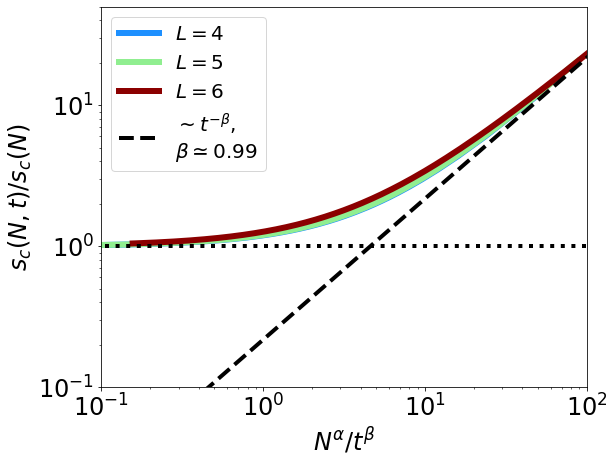

In [6]:
plt.rc('font', size=24)
plt.figure(num=None,  dpi=400, edgecolor='k')
fig, ax = plt.subplots(1,1)

ax.plot(16 ** alpha / t ** beta, sc_l4 / sc_arr[0], color=colorcode[0], linestyle='-', markersize=4, label=r'$L=4$', linewidth=6)
ax.plot(25 ** alpha / t ** beta, sc_l5 / sc_arr[1], color=colorcode[1], linestyle='-', markersize=4, label=r'$L=5$', linewidth=6)
ax.plot(36 ** alpha / t ** beta, sc_l6 / sc_arr[2], color=colorcode[2], linestyle='-', markersize=4, label=r'$L=6$', linewidth=6)
ax.plot(36 ** alpha / np.linspace(1, 1000, 1000) ** beta, (1 / np.linspace(1, 1000, 1000)) ** beta / sc_arr[2], color='k', linestyle='--', linewidth=4, label='$\sim t^{-β}$,\n$β\simeq$'+str(np.round(0.99,2)))
ax.plot([1e-3, 1e3], [1, 1], color='k', linestyle=':', linewidth=4)

plt.xscale('log')
plt.yscale('log')
plt.ylim((1e-1, 5e1))
plt.xlim((1e-1, 1e2))
plt.ylabel('$s_{c}(N,t)/s_{c}(N)$')
plt.xlabel('$N^{α}/t^{β}$')
plt.legend(fontsize=20)
fig.set_size_inches(8.7, 7)
plt.savefig('./phase-transition-4.jpg', dpi=400, bbox_inches="tight")

# SCGF

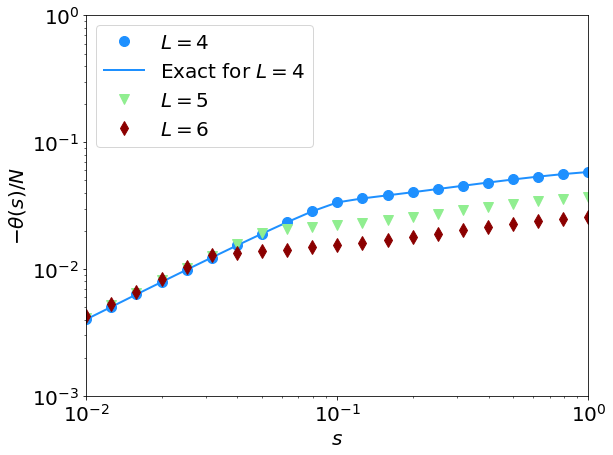

In [7]:
s = 10 ** np.linspace(-2, 0, 21)

with open('./data/theta_l4.npy', 'rb') as f:
    theta_l4 = np.load(f)
    
with open('./data/theta_l4_exact.npy', 'rb') as f:
    theta_l4_exact = np.load(f)

with open('./data/theta_l5.npy', 'rb') as f:
    theta_l5 = np.load(f)

with open('./data/theta_l6.npy', 'rb') as f:
    theta_l6 = np.load(f)

plt.rc('font', size=20)
fig, ax1 = plt.subplots()
fig.set_size_inches(9, 7)

marksize = 10
linewidth = 2
colorcode=['dodgerblue','lightgreen','darkred']
markercode=['o','v','d']

ax1.plot(s, -theta_l4 / 16, 'o', color=colorcode[0], ms=marksize, label=r'$L=4$')
ax1.plot(s, -theta_l4_exact / 16, colorcode[0], lw=linewidth, label='Exact for ' + r'$L=4$')
ax1.plot(s, -theta_l5 / 25, 'v', c=colorcode[1], ms=marksize, label=r'$L=5$')
ax1.plot(s, -theta_l6 / 36, 'd', c=colorcode[2], ms=marksize, label=r'$L=6$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax1.legend(loc="upper left",fontsize=20)
ax1.set_ylabel(r'$-\theta(s)/N$')
ax1.set_xlabel(r'$s$')
ax1.set_xlim([1e-2, 1e0])
ax1.set_ylim([1e-3, 1e0])
plt.savefig('./se-scgf-1.jpg', dpi=400, bbox_inches="tight")

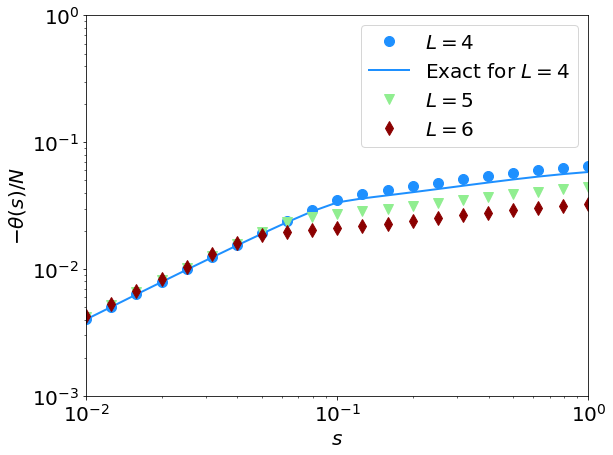

In [8]:
with open('./data/thetats_l4_long.npy', 'rb') as f:
    thetats_l4_long = np.load(f)
    
with open('./data/thetats_l5_long.npy', 'rb') as f:
    thetats_l5_long = np.load(f)
    
with open('./data/thetats_l6_long.npy', 'rb') as f:
    thetats_l6_long = np.load(f)

plt.rc('font', size=20)
fig, ax1 = plt.subplots()
fig.set_size_inches(9, 7)

marksize = 10
linewidth = 2
colorcode=['dodgerblue','lightgreen','darkred']
markercode=['o','v','d']

ax1.plot(s, -thetats_l4_long/16, 'o', color=colorcode[0], ms=marksize, label=r'$L=4$')
ax1.plot(s, -theta_l4_exact / 16, colorcode[0], lw=linewidth, label='Exact for ' + r'$L=4$')
ax1.plot(s, -thetats_l5_long/25, 'v', color=colorcode[1], ms=marksize, label=r'$L=5$')
ax1.plot(s, -thetats_l6_long/36, 'd', color=colorcode[2], ms=marksize, label=r'$L=6$')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax1.legend(loc="upper left",fontsize=20)

ax1.legend()
ax1.set_ylabel(r'$-\theta(s)/N$')
ax1.set_xlabel(r'$s$')
ax1.set_xlim([1e-2, 1e0])
ax1.set_ylim([1e-3, 1e0])
plt.savefig('./se-scgf-2.jpg', dpi=400, bbox_inches="tight")